<a href="https://colab.research.google.com/github/hin1799/DeepNeuralNLP/blob/main/DataSquad_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESEARCH PAPER SIMPLIFIER

**Submitted by:**

**Jainisha Choksi (202211019)**

**Hinal Desai (202211035)**

**Man Desai (202211040)**

**Rutvik Prajapati (202211053)**

# Installing required libraries

In [1]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ef42a488c995cd204e9416c8fe03adc19b8933ca6fe9a4824300051f5eaccfa1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from num2words import num2words
from nltk.tokenize import word_tokenize

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

We have used the peS2o dataset and extracted the research papers that belong to the 'cse' domain only. This was done as a part of assignment 1. The following dataframe df contains the research papers that belongs to cse domain.

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/NLP_Project/cse_domain_papers.pkl')

# Train-Test split

In [6]:
train = df[:3000]
test = df[3000:]

# Preprocessing the research paper dataset

In [7]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [8]:
#Preprocessing function
def preprocess_text(text):
  #Remove URLs
  text = re.sub(r'http\S+|www\S+', '', text)

  #Remove bullets
  text = re.sub(r'•', '', text)

  # Remove apostrophes and hyphens
  text = re.sub(r"['’]", '', text)
  text = re.sub(r'-', ' ', text)

  # Remove punctuation except full stop (period) so that we can know when sentences stop
  text = re.sub(r'[^\w\s\'.]', '', text)

  #Removing leading and trailing whitespaces
  text = text.strip()

  #Remove stopwords
  tokens = text.split()
  tokens = [word.lower() for word in tokens if word.lower() not in stopwords]
  text = ' '.join(tokens)

  #Converting numbers to text
  text = re.sub(r'\d+', '', text)
  tokens = word_tokenize(text)
  converted_tokens = []
  for token in tokens:
    try:
      num = int(token)
      word = num2words(num)
      converted_tokens.append(word)
    except ValueError:
      converted_tokens.append(token)
  text = ' '.join(converted_tokens)

  return text

In [9]:
#Applying preprocessing function
train['cleaned_text'] = train['text'].apply(preprocess_text)

<ipython-input-9-813a7ae8618a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cleaned_text'] = train['text'].apply(preprocess_text)


In [10]:
train.head()

,id,source,version,added,created,text,paper_id,fieldOfStudy,cleaned_text
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...,c0b6a8dfe459a17b885902f1415c5f0acfd72cc5,['Computer Science'],complete targets coverage energy harvesting in...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...,6602075f1e6fd8966e98de07be4230ec72b1ed0b,['Computer Science'],nonorthogonal multiple access enabled two way ...
6,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,Event-Triggered Adaptive Output Feedback Contr...,4767015228fb30be57a21b626c7867239255b3b6,['Computer Science'],event triggered adaptive output feedback contr...
18,255290365,s2ag/valid,v1,2022-12-31T16:09:26.680Z,2022-12-22T00:00:00.000Z,From MMU to MPU: Adaptation of the Pip Kernel ...,f72832c96c65f630e5fedcc932442d38ca1be760,['Computer Science'],mmu mpu adaptation pip kernel constrained devi...
37,249073215,s2ag/valid,v1,2022-05-27T15:22:24.852Z,2023-04-01T00:00:00.000Z,Data-Driven Cyber-Attack Detection of Intellig...,ab61f83262b23dc81f77f6dc3e80cb81e2889b7d,['Computer Science'],data driven cyber attack detection intelligent...


In [11]:
train['cleaned_text'].iloc[0]

'complete targets coverage energy harvesting internet things ambient backscatter article considers deriving set covers set active nodes responsible monitoring targets internet things iot network . key distinction prior works article considers sensor nodes aided backscatter communications allow communicate negligible energy cost using ambient radio frequency rf signals . article contains three main novelties . first presents mixed integer linear program milp used compute global optimal solution . second also outlines centralized greedy scheduling cgs algorithm selects nodes based energy number covered targets . third presents distributed greedy scheduling dgs algorithm selects nodes according energy level . simulation results show equipping nodes ambient backscattering capability increases ratio complete targets coverage compared existing techniques .'

# Model Building

## 1. Complex Word Identification model

Select the words that need to be simplified. So, we need to train a model to detect complex words in a sentence. This model is called CWI: Complex Word Identification model.



In [12]:
#Importing required libraries
from collections import namedtuple
from nltk import word_tokenize
from functools import lru_cache
import re
import unicodedata
import sys
from collections import Counter
import nltk
from nltk.corpus import brown
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [13]:
#Creating named tuples
Dataset = namedtuple('Dataset', 'name, train, test')
Model = namedtuple('Model', 'type, name, dimension, corpus, model')

**Getting the dataset to train complex words identification model**

In [14]:
!wget https://www.inf.uni-hamburg.de/en/inst/ab/lt/resources/data/complex-word-identification-dataset/cwishareddataset.zip

--2023-12-14 15:35:32--  https://www.inf.uni-hamburg.de/en/inst/ab/lt/resources/data/complex-word-identification-dataset/cwishareddataset.zip
Resolving www.inf.uni-hamburg.de (www.inf.uni-hamburg.de)... 134.100.36.5
Connecting to www.inf.uni-hamburg.de (www.inf.uni-hamburg.de)|134.100.36.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cwishareddataset.zip’

cwishareddataset.zi     [     <=>            ]   1.03M  1.05MB/s    in 1.0s    

2023-12-14 15:35:33 (1.05 MB/s) - ‘cwishareddataset.zip’ saved [1075894]



In [15]:
!unzip cwishareddataset.zip

Archive:  cwishareddataset.zip
   creating: traindevset/
   creating: traindevset/german/
  inflating: traindevset/german/German_Train.tsv  
  inflating: traindevset/german/German_Dev.tsv  
  inflating: traindevset/README.md   
   creating: traindevset/english/
  inflating: traindevset/english/WikiNews_Train.tsv  
  inflating: traindevset/english/Wikipedia_Train.tsv  
  inflating: traindevset/english/Wikipedia_Dev.tsv  
  inflating: traindevset/english/News_Dev.tsv  
  inflating: traindevset/english/News_Train.tsv  
  inflating: traindevset/english/WikiNews_Dev.tsv  
   creating: traindevset/spanish/
  inflating: traindevset/spanish/Spanish_Train.tsv  
  inflating: traindevset/spanish/Spanish_Dev.tsv  
  inflating: README.md               
   creating: testset/
   creating: testset/german/
  inflating: testset/german/German_Test.tsv  
  inflating: testset/README.md       
   creating: testset/english/
  inflating: testset/english/Wikipedia_Test.tsv  
   creating: __MACOSX/
   creating:

In [16]:
MAIN_PATH_DATASET = "traindevset/english/"
genres = ['Wikipedia', 'WikiNews', 'News']
datasets = ['Train', 'Dev']
columns = ['id', 'sentence', "start", "end", "target",
           "nat", "non_nat", "nat_marked", "non_nat_marked", "binary", "prob"]


datasets = [Dataset('Wikipedia', 'Train', 'Dev'),
            Dataset('WikiNews', 'Train', 'Dev'),
            Dataset('News', 'Train', 'Dev')]

feature_categories = []

#This function is used to load the dataframe from tsv file (tab separated values)
def load_df(path):
    df = pd.read_csv(path, header=None, sep = "\t")
    df.columns = columns
    return df

datasets = [Dataset(d.name, load_df(MAIN_PATH_DATASET + d.name + '_' + d.train + '.tsv'),
                            load_df(MAIN_PATH_DATASET + d.name + '_' + d.test + '.tsv'))
                            for d in datasets]

**Getting the glove embeddings**

In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-12-14 15:35:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-14 15:35:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-14 15:35:40--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [18]:
!unzip glove.6B.zip -d embeddings

Archive:  glove.6B.zip
  inflating: embeddings/glove.6B.50d.txt  
  inflating: embeddings/glove.6B.100d.txt  
  inflating: embeddings/glove.6B.200d.txt  
  inflating: embeddings/glove.6B.300d.txt  


In [19]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

MAIN_PATH = 'embeddings/'


glove_models = []

glove_d = [ Model('glove', 'glove.6B.300d.txt', 300, 'wikipedia+gigaword5', None)]

for model in glove_d:
    glove_file = MAIN_PATH + model.name
    temp = get_tmpfile(model.name + '-temp')
    glove2word2vec(glove_file, temp)
    vecs = KeyedVectors.load_word2vec_format(temp)
    glove_models.append(Model(model.type, model.name, model.dimension, model.corpus, vecs))

In [20]:
print(glove_models)

[Model(type='glove', name='glove.6B.300d.txt', dimension=300, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.KeyedVectors object at 0x7b5d9d2a68c0>)]


In [21]:
dataframe = datasets[0].train[0:30]

def overlaps(start1, end1, start2, end2):
    return bool(range(max(start1, start2), min(end1, end2)+1))

def extract_ngrams_group(group):
    targets = zip(group['target'].values.tolist(), group['start'].values.tolist(),
                 group['end'].values.tolist(), group['binary'].values.tolist())
    for word, start, end, binary in targets:
        tokens = word.split()
        if len(tokens)>1:
            olap_words = [(w, b) for w, s, e, b in targets if overlaps(start, end, s, e)]


grouped = dataframe.groupby('sentence').apply(lambda group : extract_ngrams_group(group))

In [22]:
wordlist_lowercased = set(i.lower() for i in brown.words())
print (len(wordlist_lowercased))

49815


In [23]:
tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))

In [24]:
def punctuation_removal(text):
    return text.translate(tbl)

In [25]:
@lru_cache(maxsize=None)
def get_all_tokens_with_index(context):
    curr_pos = 0
    targets = []
    j = 0
    w = 0
    curr_split = ''
    ctx_split = context.split()
    whitespaces = re.findall('\s+', context)
    num_whitespaces = [len(token) for token in whitespaces]
    num_whitespaces.append(1)
    tokens = word_tokenize(context)
    tokens = ['"' if token not in context else token for token in tokens]
    for index, token in enumerate(tokens, 1):
        targets.append((token, index, curr_pos, (curr_pos + len(token))))
        curr_pos += len(token)
        curr_split += token
        if ctx_split[j] == curr_split:
            curr_pos += num_whitespaces[w]
            j += 1
            w += 1
            curr_split = ''
    return [val for val in targets if val[0] != '"']

In [26]:
def create_vocabulary(sentences, embedding_model, dimension):
    all_words = [tpl[0] for sentence in sentences for tpl in sentence['seq']] + list(wordlist_lowercased)
    print('# Words : {}'.format(len(all_words)))
    counter = Counter(all_words)
    vocab_size = len(counter) + 1
    print('# Vocab : {}'.format(vocab_size))
    print('# embeding model  : {}'.format(len(embedding_model.key_to_index)))
    word2index = {word : index for index, (word, count) in enumerate(counter.most_common(), 1)}
    index2word = {index : word for word, index in word2index.items()}
    # +1 required for pad token
    embedding_matrix = np.zeros(((vocab_size), dimension))
    missing_embed_words = []
    i_ = 0
    for word, index in word2index.items():
        if word in embedding_model.key_to_index:
            embedding = embedding_model[word]
        else:
             i_ +=1
             continue
        embedding_matrix[index] = embedding
    missing_embed_count = len(missing_embed_words)
    print('# Words missing embedding : {}'.format(missing_embed_count))
    print('Embedding shape : {}'.format(embedding_matrix.shape))
    print("i: ", i_ )
    return word2index, index2word, embedding_matrix

In [33]:
def forward_transformation(dataframe, lowercase = True, filter_punc = True, filtering = "a132"):
    grouped = dataframe.groupby('sentence').apply(lambda row :
                        {'sent_id' : list(set(row['sent_id']))[0],
                         'sentence' : list(set(row['sentence']))[0],
                         'tags': [tag for tag in zip(row['target'],
                            row['start'], row['end'], row['binary'], row['prob'])]})
    sentences = []
    for vals in grouped:
        sent_id = vals['sent_id']
        sentence = vals['sentence']
        tags = vals['tags']
        tags_without_labels = [(word, start, end) for word, start, end, binary, prob in tags]
        all_tokens = get_all_tokens_with_index(sentence)
        sent_repr = [(word, start, end, tags[tags_without_labels.index((word, start, end))][3],
                     tags[tags_without_labels.index((word, start, end))][4])
           if (word, start, end) in tags_without_labels
          else (word, start, end, 0, 0.0) for word, index, start, end in all_tokens]
        if lowercase:
            sent_repr = [(word.lower(), start, end, binary, prob)
                         for word, start, end, binary, prob in sent_repr]
        if filter_punc:
            sent_repr = list(filter(lambda vals : punctuation_removal(vals[0]), sent_repr))
        if filtering:
            sent_repr = list(filter(lambda vals : vals[0] != "'s", sent_repr))
            sent_repr = list(filter(lambda vals : vals[0] != "``", sent_repr))
        sentences.append({'sent_id' : sent_id, 'sentence' : sentence, 'seq' : sent_repr})
    return sentences

In [28]:
def split_sentence_sequences(sentences):
    words, start_end, binary, prob = [], [], [] ,[]
    for sent in sentences:
        sequence = sent['seq']
        curr_w, curr_se, curr_b, curr_p = map(list, zip(*[(vals[0],
            (vals[1], vals[2]), vals[3], vals[4]) for vals in sequence]))
        words.append(curr_w)
        start_end.append(curr_se)
        binary.append(curr_b)
        prob.append(curr_p)
    return words, start_end, binary, prob

In [29]:
datasets.append(Dataset('train_all_test_wiki',
        datasets[0].train.append(datasets[1].train).append(datasets[2].train), datasets[0].test))

<ipython-input-29-995e8cdc830f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets[0].train.append(datasets[1].train).append(datasets[2].train), datasets[0].test))


In [30]:
# Append train and test set
dataset_sel = datasets[3]
train_num_rows = dataset_sel.train.shape[0]
train_num_sents = len(list(set(dataset_sel.train.sentence.values.tolist())))

test_num_rows = dataset_sel.test.shape[0]
test_num_sents = len(list(set(dataset_sel.test.sentence.values.tolist())))

dataset = dataset_sel.train.append(dataset_sel.test)
dataset['sent_id'] = dataset.groupby('sentence').ngroup()
dataset_num_rows = dataset.shape[0]
dataset_num_sents = len(list(set(dataset.sentence.values.tolist())))

print('# Rows train : {}'.format(train_num_rows))
print('# Rows test : {}'.format(test_num_rows))
print('# Rows dataset : {}'.format(dataset_num_rows))

print('# Sents train : {}'.format(train_num_sents))
print('# Sents test : {}'.format(test_num_sents))
print('# Sents dataset : {}'.format(dataset_num_sents))

# Rows train : 27299
# Rows test : 694
# Rows dataset : 27993
# Sents train : 1988
# Sents test : 53
# Sents dataset : 2041


<ipython-input-30-fa260ecfaaf6>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset_sel.train.append(dataset_sel.test)


### The training dataset:

In [31]:
dataset.head(2)

,id,sentence,start,end,target,nat,non_nat,nat_marked,non_nat_marked,binary,prob,sent_id
0,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to fut...",0,8,Normally,10,10,0,1,1,0.05,1347
1,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to fut...",28,34,passed,10,10,0,1,1,0.05,1347


In [34]:
sentences = forward_transformation(dataset)
train_sentences = sentences[:train_num_sents]
test_sentences = sentences[train_num_sents:]

In [35]:
words, start_end, binary, prob = split_sentence_sequences(sentences)

In [36]:
sentence_lens = [len(sent) for sent in words]

In [37]:
print("The dimensions of embedding vectors are:")
embedding_model = glove_models[0].model
dimension = embedding_model.vector_size
word2index, index2word, embedding = create_vocabulary(sentences, embedding_model, dimension)

The dimensions of embedding vectors are:
# Words : 96437
# Vocab : 52455
# embeding model  : 400000
# Words missing embedding : 0
Embedding shape : (52455, 300)
i:  9834


In [38]:
glove_models[0].model

### Padding input sequences and getting the binary labels

In [39]:
words_with_indices = [[word2index[word] for word in sent] for sent in words]
sent_lens = [len(sentence['seq']) for sentence in sentences]
sent_max_length = np.max(sent_lens)
print('Max length sentence : {}'.format(sent_max_length))

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

words_padded = pad_sequences(maxlen=sent_max_length, sequences=words_with_indices, padding="post", value=0)
binary_padded = pad_sequences(maxlen=sent_max_length, sequences=binary, padding="post", value=0)
prob_padded = pad_sequences(maxlen=sent_max_length, sequences=prob, padding="post", value=0, dtype="float")

binary_padded_categorical = [to_categorical(clazz, num_classes=2) for clazz in binary_padded]

Max length sentence : 103


### Train-Test split

In [40]:
#Training set
train_words_padded = words_padded[:train_num_sents]
train_binary_padded = binary_padded[:train_num_sents]
train_binary_padded_categorical = binary_padded_categorical[:train_num_sents]
train_prob_padded = prob_padded[:train_num_sents]
train_start_end = start_end[:train_num_sents]

#Test set
test_words_padded = words_padded[train_num_sents:]
test_binary_padded = binary_padded[train_num_sents:]
test_binary_padded_categorical = binary_padded_categorical[train_num_sents:]
test_prob_padded = prob_padded[train_num_sents:]
test_start_end = start_end[train_num_sents:]

print('Training set length : {}'.format(len(train_words_padded)))
print('Test set length : {}'.format(len(test_words_padded)))

Training set length : 1988
Test set length : 53


### Keras callback to perform model validation during training using f1_score.

In [41]:
from sklearn.metrics import f1_score
import keras.callbacks
from keras import backend as K
class Metrics(keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.f1_scores = []
        self.validation_data = validation_data

    def on_epoch_end(self, batch, logs={}):
        predict = np.asarray(self.model.predict(self.validation_data[0]))
        targ = self.validation_data[1]
        targ = np.array(targ)
        shape = targ.shape
        targ = targ.reshape((shape[0]*shape[1], shape[2]))
        targ = np.argmax(targ, axis = 1)
        predict = predict.reshape((shape[0]*shape[1]), shape[2])
        predict = np.argmax(predict, axis = 1)
        self.f1s=f1_score(targ, predict)
        print("\nF1 Score:")
        print(f1_score(targ, np.ones(shape[0]*shape[1])))
        self.f1_scores.append(self.f1s)
        return

### Model for complex word identification

In [42]:
from keras.models import Model
from keras import backend as K
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input

vocab_size = embedding.shape[0]
dimension = embedding.shape[1]

np.set_printoptions(threshold=np.inf)

in_seq = Input(shape=(sent_max_length,))
embed = Embedding(input_dim=vocab_size, output_dim=dimension, \
                  weights=[embedding], input_length=sent_max_length)(in_seq)
drop = Dropout(0.1)(embed)
lstm = Bidirectional(LSTM(units=150, return_sequences=True, recurrent_dropout=0.1))(drop)
out = TimeDistributed(Dense(2, activation="softmax"))(lstm)

model = Model(in_seq, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

metrics = Metrics((test_words_padded, np.array(test_binary_padded_categorical)))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 103)]             0         
                                                                 
 embedding (Embedding)       (None, 103, 300)          15736500  
                                                                 
 dropout (Dropout)           (None, 103, 300)          0         
                                                                 
 bidirectional (Bidirection  (None, 103, 300)          541200    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 103, 2)            602       
 ributed)                                                        
                                                                 
Total params: 16278302 (62.10 MB)
Trainable params: 16278302 

In [ ]:
history = model.fit(train_words_padded, np.array(train_binary_padded_categorical), batch_size=10,
                    epochs=5, validation_data = (test_words_padded, np.array(test_binary_padded_categorical)),
                    verbose=1, callbacks=[metrics])

Epoch 1/5
2/2 [==============================] - 1s 105ms/step

F1 Score:
0.05660377358490566
199/199 [==============================] - 232s 1s/step - loss: 0.0867 - accuracy: 0.9673 - val_loss: 0.0448 - val_accuracy: 0.9793
Epoch 2/5
2/2 [==============================] - 0s 122ms/step

F1 Score:
0.05660377358490566
199/199 [==============================] - 199s 1s/step - loss: 0.0406 - accuracy: 0.9827 - val_loss: 0.0429 - val_accuracy: 0.9808
Epoch 3/5
2/2 [==============================] - 1s 292ms/step

F1 Score:
0.05660377358490566
199/199 [==============================] - 240s 1s/step - loss: 0.0306 - accuracy: 0.9872 - val_loss: 0.0440 - val_accuracy: 0.9815
Epoch 4/5
2/2 [==============================] - 0s 106ms/step

F1 Score:
0.05660377358490566
199/199 [==============================] - 295s 1s/step - loss: 0.0251 - accuracy: 0.9895 - val_loss: 0.0460 - val_accuracy: 0.9809
Epoch 5/5
2/2 [==============================] - 0s 110ms/step

F1 Score:
0.05660377358490566
19

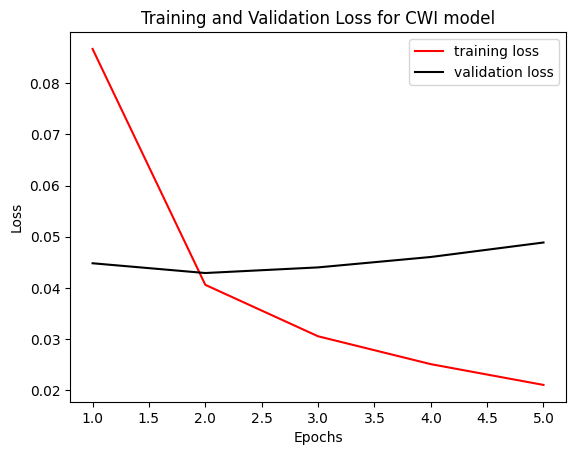

In [ ]:
#Plotting the loss
import matplotlib.pyplot as plt
epochs = range(1, 6)

plt.plot(epochs, history.history['loss'], color='red', label='training loss')
plt.plot(epochs, history.history['val_loss'], color='black', label='validation loss')
plt.title('Training and Validation Loss for CWI model')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [43]:
#Saving the trained model
model_name = 'cwi_trained.h5'
path = f'/content/drive/MyDrive/NLP_Project/{model_name}'

In [ ]:
from keras.models import load_model

model.save(path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
#Loading the trained model
from keras.models import load_model

model_cwi = load_model(path)

**Helper functions for data cleaning**

In [45]:
stop_words_ = set(stopwords.words('english'))
def cleaner(word):
  #Remove links
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',
                '', word, flags=re.MULTILINE)
  word = re.sub('[\W]', ' ', word)
  word = re.sub('[^a-zA-Z]', ' ', word)
  return word.lower().strip()

def process_input(input_text):
  input_text = cleaner(input_text)
  clean_text = []
  index_list =[]
  input_token = []
  index_list_zipf = []
  for i, word in enumerate(input_text.split()):
    if word in word2index:
      clean_text.append(word)
      input_token.append(word2index[word])
    else:
      index_list.append(i)
  input_padded = pad_sequences(maxlen=sent_max_length, sequences=[input_token], padding="post", value=0)
  return input_padded, index_list, len(clean_text)

def complete_missing_word(pred_binary, index_list, len_list):
  list_cwi_predictions = list(pred_binary[0][:len_list])
  for i in index_list:
    list_cwi_predictions.insert(i, 0)
  return list_cwi_predictions

## 2. Generate candidates (simpler words for these complex words)

**Using BERT for now**

In [46]:
!pip install transformers
!pip install torch

In [47]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

bert_model = 'bert-large-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model)
model = BertForMaskedLM.from_pretrained(bert_model)
model.eval()

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-12, 

In [48]:
!pip install wordfreq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: regex
    Found existing installation: regex 2023.6.3
    Uninstalling regex-2023.6.3:
      Successfully uninstalled regex-2023.6.3


## 3. Select the best candidates

In [49]:
from wordfreq import zipf_frequency
zipf_frequency('stop', 'en')

5.52

In [50]:
from wordfreq import zipf_frequency
zipf_frequency('compensation', 'en')

4.33

**Function to get the candidates using BERT**

In [51]:
def get_bert_candidates(input_text, list_cwi_predictions, numb_predictions_displayed = 10):
  list_candidates_bert = []
  #iterating over the word and its corresponding cwi prediction
  for word,pred  in zip(input_text.split(), list_cwi_predictions):
    #checking if the word should be considered for replacement
    if (pred and (pos_tag([word])[0][1] in ['NNS', 'NN', 'VBP', 'RB', 'VBG','VBD' ]))  or (zipf_frequency(word, 'en')) <3.1:

      #if the word is chosen for replacement, then apply ['MASK'] to it.
      replace_word_mask = input_text.replace(word, '[MASK]')

      #creating input text for BERT
      text = f'[CLS]{replace_word_mask} [SEP] {input_text} [SEP] '

      #tokenize the input text
      tokenized_text = tokenizer.tokenize(text)

      #finding the index of the ['MASK'] token
      masked_index = [i for i, x in enumerate(tokenized_text) if x == '[MASK]'][0]

      #convert tokens to their corresponding indices
      indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
      segments_ids = [0]*len(tokenized_text)

      #converting indices to pytorch tensors
      tokens_tensor = torch.tensor([indexed_tokens])
      segments_tensors = torch.tensor([segments_ids])

      # Predict probabilities for all tokens
      with torch.no_grad():
          outputs = model(tokens_tensor, token_type_ids=segments_tensors)
          predictions = outputs[0][0][masked_index]

      #selecting the top predicted tokens
      predicted_ids = torch.argsort(predictions, descending=True)[:numb_predictions_displayed]
      predicted_tokens = tokenizer.convert_ids_to_tokens(list(predicted_ids))

      #append the original word and its predicted replacements to the list
      list_candidates_bert.append((word, predicted_tokens))
  return list_candidates_bert

# Testing the model

In [53]:
train = train.reset_index().drop('index', axis=1)

In [56]:
train

,id,source,version,added,created,text,paper_id,fieldOfStudy,cleaned_text
0,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...,c0b6a8dfe459a17b885902f1415c5f0acfd72cc5,['Computer Science'],complete targets coverage energy harvesting in...
1,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...,6602075f1e6fd8966e98de07be4230ec72b1ed0b,['Computer Science'],nonorthogonal multiple access enabled two way ...
2,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,Event-Triggered Adaptive Output Feedback Contr...,4767015228fb30be57a21b626c7867239255b3b6,['Computer Science'],event triggered adaptive output feedback contr...
3,255290365,s2ag/valid,v1,2022-12-31T16:09:26.680Z,2022-12-22T00:00:00.000Z,From MMU to MPU: Adaptation of the Pip Kernel ...,f72832c96c65f630e5fedcc932442d38ca1be760,['Computer Science'],mmu mpu adaptation pip kernel constrained devi...
4,249073215,s2ag/valid,v1,2022-05-27T15:22:24.852Z,2023-04-01T00:00:00.000Z,Data-Driven Cyber-Attack Detection of Intellig...,ab61f83262b23dc81f77f6dc3e80cb81e2889b7d,['Computer Science'],data driven cyber attack detection intelligent...
...,...,...,...,...,...,...,...,...,...
2995,254994030,s2ag/valid,v1,2022-12-23T16:02:38.402Z,2022-12-20T00:00:00.000Z,Multiple Existence Results of Nontrivial Solut...,872aace5b49044baded4e01b2145bc078a4a8050,['Computer Science'],multiple existence results nontrivial solution...
2996,254954581,s2ag/valid,v1,2022-12-22T16:22:01.021Z,2022-12-15T00:00:00.000Z,Controlling Bifurcation and Birhythmicity in a...,a2c26a725faceeec1a942bc5b9778950802d2831,['Computer Science'],controlling bifurcation birhythmicity birhythm...
2997,255018692,s2ag/valid,v1,2022-12-24T16:09:05.658Z,2022-12-22T00:00:00.000Z,Research on a New Control System Based on L1 A...,8278adfe91e39607b9538310e7f3cfeecd299935,['Computer Science'],research new control system based l adaptive c...
2998,255327044,s2ag/valid,v1,2023-01-01T16:01:53.316Z,2022-12-29T00:00:00.000Z,Blending Sea Surface Winds from the HY-2 Satel...,10f458d2e39a57fb309797c6f4aa03f6e929ac7b,['Computer Science'],blending sea surface winds hy satellite scatte...


In [62]:
text = train.iloc[5].text #Trying on original text without stopword removal

In [64]:
sentences = text.split('.')

In [65]:
#Simplifying research paper sentences

def simplify_research_paper(text_data):
  for input_text in sentences:
    new_text = input_text
    input_padded, index_list, len_list = process_input(input_text)
    pred_cwi = model_cwi.predict(input_padded)
    pred_cwi_binary = np.argmax(pred_cwi, axis = 2)
    complete_cwi_predictions = complete_missing_word(pred_cwi_binary, index_list, len_list)
    bert_candidates =   get_bert_candidates(input_text, complete_cwi_predictions)
    for word_to_replace, l_candidates in bert_candidates:
      tuples_word_zipf = []
      for w in l_candidates:
        if w.isalpha():
          tuples_word_zipf.append((w, zipf_frequency(w, 'en')))
      tuples_word_zipf = sorted(tuples_word_zipf, key = lambda x: x[1], reverse=True)
      new_text = re.sub(word_to_replace, tuples_word_zipf[0][0], new_text)
    print("Original text: ", input_text )
    print("Simplified text:", new_text, "\n")

In [66]:
simplify_research_paper(sentences)

1/1 [==============================] - 0s 162ms/step
Original text:  Algorithm for Determining the Types of Inverse Kinematics Solutions for Sequential Planar Robots and Their Representation in the Configuration Space

The work defines in a new way the different types of solutions of the inverse kinematics (IK) problem for planar robots with a serial topology and presents an algorithm for solving it
Simplified text: problem for setting the Types of index functions Solutions for Sequential distributed systems and Their description in the state Space

The work defined in a new way the different types of solutions of the associate control (IK) problem for the systems with a serial topology and present an idea for finding it 

1/1 [==============================] - 0s 106ms/step
Original text:   The developed algorithm allows the finding of solutions for a wide range of robots by using a geometric approach, representing points in a polar coordinate system
Simplified text:  The developed sy

# Evaluation

In [87]:
from nltk.translate.bleu_score import sentence_bleu

original = [word_tokenize("Event-Triggered Adaptive Output Feedback Control for Stochastic Nonlinear Systems With Time-Varying Full-State Constraints")]
replaced = word_tokenize("Event-Triggered Adaptive Output Feedback system for Stochastic complex Systems With Time-Varying Full-State problems")

score = sentence_bleu(original, replaced)

In [88]:
score

0.4250281413416978

In [68]:
from nltk.translate.bleu_score import sentence_bleu

original = [word_tokenize("The developed algorithm allows the finding of solutions for a wide range of robots by using a geometric approach, representing points in a polar coordinate system")]
replaced = word_tokenize("The developed system allowed the finding of solutions for a wide family of problems by using a linear approach, representing points in a polar coordinate system ")

score = sentence_bleu(original, replaced)
score

0.5828833474188783